In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import lightgbm as lgb
from sklearn import preprocessing, metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import gc
from tqdm import tqdm
from scipy.sparse import csr_matrix
from  datetime import datetime, timedelta

In [2]:
cd C:/Users/minih/python_prac1/library/m5/

C:\Users\minih\python_prac1\library\m5


In [3]:
valid_test_predict = pd.read_csv("val_set_6_03_3.csv")

In [4]:
valid_test_predict.drop("Unnamed: 0", axis=1, inplace=True)

In [30]:
datas = pd.read_pickle("all_sales_train_validation_translated_contain_null.pickle")

In [6]:
datas = datas[(datas['date'] >= '2016-03-28')& (datas['date'] <= '2016-04-24')]

In [7]:
features = [
   #訓練に用いる特徴量をここに記述
    "item_id",
    "dept_id",
    "cat_id",
    "store_id",
    "state_id",
    "event_name_1",
    #"event_type_1",
    "event_name_2",
    #"event_type_2",
    
    
    "snap_CA",
    "snap_TX",
    "snap_WI",
    
    "sell_price",
    # demand features.
    #'prev_1',
    #'prev_2',
    #'prev_7', 
    #'prev_14', 
    'prev_28',
    'prev_29',
    'prev_35',
    #'prev_182', 
    'prev_365', 
    'p_prev_1', 
    'rolling_mean_t7',
    'rolling_mean_t30', 
    'rolling_mean_t60',
    'rolling_mean_t90',
    'rolling_mean_t180',
    'rolling_std_t7',
    'rolling_std_t30',
    'rolling_std_t60',
    'rolling_std_t90',
    'rolling_std_t180',
    "price_change_t1",
    "rolling_price_std_t7",
    "rolling_price_std_t30",
    # time features.
    "year",
    "month",
    "week",
    "day",
    "dayofweek",
    #"is_year_end",
    #"is_year_start",
    #"is_quarter_end",
    #"is_quarter_start",
    #"is_month_end",
    #"is_month_start",
    #"is_weekend",
]

In [9]:
datas["num"] = np.arange(853720)

In [11]:
datas = pd.merge(datas,valid_test_predict, on="num")

In [ ]:
datas.shape

In [10]:
valid_test_predict["num"] = np.arange(853720)

In [13]:
datas.drop("id_y",inplace=True,axis=1)

In [16]:
store_CA_1 = datas[datas["store_id"]==0]

In [18]:
store_CA_1

,id_x,item_id,dept_id,cat_id,store_id,state_id,sell_num,date,event_name_1,event_type_1,...,dayofweek,is_weekend,rolling_mean_t7,rolling_mean_t30,rolling_mean_t60,rolling_mean_t90,rolling_mean_t180,num,valid,predict
0,HOBBIES_1_001_CA_1_validation,1437,3,1,0,0,1.0,2016-03-28,30,4,...,0,0,1.142578,1.000000,0.883301,0.833496,0.710938,0,0.904269,0.816232
1,HOBBIES_1_002_CA_1_validation,1438,3,1,0,0,1.0,2016-03-28,30,4,...,0,0,0.142822,0.166626,0.150024,0.399902,0.366699,1,0.248353,0.287065
2,HOBBIES_1_003_CA_1_validation,1439,3,1,0,0,0.0,2016-03-28,30,4,...,0,0,0.000000,0.300049,0.250000,0.655762,0.661133,2,0.249387,0.279245
3,HOBBIES_1_004_CA_1_validation,1440,3,1,0,0,0.0,2016-03-28,30,4,...,0,0,1.857422,2.199219,2.066406,1.921875,1.883789,3,1.621262,1.936031
4,HOBBIES_1_005_CA_1_validation,1441,3,1,0,0,1.0,2016-03-28,30,4,...,0,0,1.000000,1.133789,0.916504,1.099609,1.188477,4,0.996401,0.981745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826274,FOODS_3_823_CA_1_validation,1432,2,0,0,0,1.0,2016-04-24,30,4,...,6,1,0.000000,0.466553,1.049805,1.277344,1.544922,826274,1.573973,1.109193
826275,FOODS_3_824_CA_1_validation,1433,2,0,0,0,0.0,2016-04-24,30,4,...,6,1,0.000000,0.000000,0.000000,0.000000,0.000000,826275,0.014605,0.408247
826276,FOODS_3_825_CA_1_validation,1434,2,0,0,0,2.0,2016-04-24,30,4,...,6,1,0.856934,1.099609,0.866699,0.844238,0.733398,826276,1.207490,1.312721
826277,FOODS_3_826_CA_1_validation,1435,2,0,0,0,0.0,2016-04-24,30,4,...,6,1,1.713867,1.433594,1.366211,1.322266,0.888672,826277,1.582227,1.347744


No handles with labels found to put in legend.


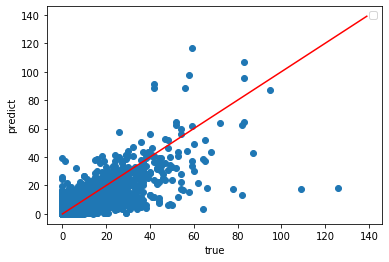

In [24]:
plt.scatter(store_CA_1["sell_num"], store_CA_1["valid"])
plt.plot(np.arange(140),np.arange(140),color="red")
plt.xlabel("true")
plt.ylabel("predict")
plt.legend()

In [25]:
store_CA_1[store_CA_1["sell_num"] >= 100]

,id_x,item_id,dept_id,cat_id,store_id,state_id,sell_num,date,event_name_1,event_type_1,...,dayofweek,is_weekend,rolling_mean_t7,rolling_mean_t30,rolling_mean_t60,rolling_mean_t90,rolling_mean_t180,num,valid,predict
154794,FOODS_3_120_CA_1_validation,732,2,0,0,0,109.0,2016-04-02,30,4,...,5,1,0.0,36.43750,33.96875,32.375,32.750,154794,17.539438,51.736174
185284,FOODS_3_120_CA_1_validation,732,2,0,0,0,126.0,2016-04-03,30,4,...,6,1,0.0,35.34375,33.43750,32.375,32.375,185284,18.229541,89.177791


In [32]:
buff = datas[(datas["dept_id"] == 2) & (datas["item_id"] == 732)&(datas["store_id"] == 0)&(datas["month"] == 4)]

In [36]:
buff = buff[(buff["day"] >= 1) & (buff["day"] <= 10)]

In [37]:
buff

,id,item_id,dept_id,cat_id,store_id,state_id,sell_num,date,event_name_1,event_type_1,...,month,week,day,dayofweek,is_weekend,rolling_mean_t7,rolling_mean_t30,rolling_mean_t60,rolling_mean_t90,rolling_mean_t180
13052064,FOODS_3_120_CA_1_validation,732,2,0,0,0,97.0,2012-04-01,30,4,...,4,13,1,6,1,47.843750,51.875000,NaN,NaN,NaN
13082554,FOODS_3_120_CA_1_validation,732,2,0,0,0,61.0,2012-04-02,30,4,...,4,14,2,0,0,57.281250,53.062500,NaN,NaN,NaN
13113044,FOODS_3_120_CA_1_validation,732,2,0,0,0,62.0,2012-04-03,30,4,...,4,14,3,1,0,58.156250,53.406250,NaN,NaN,NaN
13143534,FOODS_3_120_CA_1_validation,732,2,0,0,0,68.0,2012-04-04,30,4,...,4,14,4,2,0,62.437500,54.218750,NaN,NaN,NaN
13174024,FOODS_3_120_CA_1_validation,732,2,0,0,0,44.0,2012-04-05,30,4,...,4,14,5,3,0,61.562500,54.843750,NaN,NaN,NaN
13204514,FOODS_3_120_CA_1_validation,732,2,0,0,0,79.0,2012-04-06,30,4,...,4,14,6,4,0,61.843750,55.062500,NaN,NaN,NaN
13235004,FOODS_3_120_CA_1_validation,732,2,0,0,0,87.0,2012-04-07,30,4,...,4,14,7,5,1,67.437500,56.437500,NaN,NaN,NaN
13265494,FOODS_3_120_CA_1_validation,732,2,0,0,0,88.0,2012-04-08,4,0,...,4,14,8,6,1,67.000000,58.312500,NaN,NaN,NaN
13295984,FOODS_3_120_CA_1_validation,732,2,0,0,0,47.0,2012-04-09,30,4,...,4,15,9,0,0,67.437500,57.843750,NaN,NaN,NaN
13326474,FOODS_3_120_CA_1_validation,732,2,0,0,0,43.0,2012-04-10,30,4,...,4,15,10,1,0,64.000000,55.968750,NaN,NaN,NaN
